In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as stats
from scipy.stats import probplot

In [10]:
data_da = pd.read_csv(r"C:\Users\will2\OneDrive\Skrivebord\S.E.M.L\Danish gender.txt")
data_en = pd.read_csv(r"C:\Users\will2\OneDrive\Skrivebord\S.E.M.L\English gender.txt")


data_da['prop_men'] = data_da['Man']/10

data_da['prop_women'] = data_da['Woman']/10

data_en['prop_men'] = data_en['Man']/10

data_en['prop_women'] = data_en['Woman']/10


data_all = pd.concat([data_en,data_da])

temp1 =data_en[data_en['gender']==0]
temp2 =data_en[data_en['gender']==1]

mænd = data_da[data_da['gender']==0]
kvinder = data_da[data_da['gender']==1]


men = data_all[data_all['gender']==0]
women = data_all[data_all['gender']==1]



In [4]:
#sp =np.sqrt(((sum(data_all['prop_women'])-1)*data_all['prop_women'].std()**2 + (sum(data_all['prop_men'])-1)*data_all['prop_men'].std()**2)/(sum(data_all['prop_men'])+sum(data_all['prop_women'])-2))
#(data_all['prop_women'].mean()- data_all['prop_men'].mean())


In [5]:
import statsmodels.stats.api as sms


# Define the parameters
p1 = sum(kvinder['Woman'].head(10))/ (sum(kvinder['Man'].head(10)) + sum(kvinder['Woman'].head(10)))  # Proportion in group 1
p2 =  sum(mænd['Woman'].head(10))/ (sum(mænd['Man'].head(10)) + sum(mænd['Woman'].head(10))) # Proportion in group 2
alpha = 0.05  # Significance level
power = 0.8  # Desired power
nobs1 = 10
# Calculate the effect size
effect_size = sms.proportion_effectsize(p1, p2)

# Perform the power analysis to get the sample size per group
analysis = sms.NormalIndPower()
sample_size = analysis.solve_power(effect_size=.5, alpha=alpha, power=power, ratio=1)

print(f"Required sample size per group: {(sample_size)}")

calculated_power = analysis.solve_power(effect_size=effect_size, alpha=alpha, nobs1=nobs1)
print(f'Power achieved with a sample size of {nobs1}: {calculated_power}')
#effect_size
#2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

#p = (sum(kvinder['Woman'].head(10))+ sum(mænd['Woman'].head(10)))/((sum(kvinder['Man'].head(10)) + sum(kvinder['Woman'].head(10)))*2)


Required sample size per group: 62.79088416571135
Power achieved with a sample size of 10: 0.4800140009665385


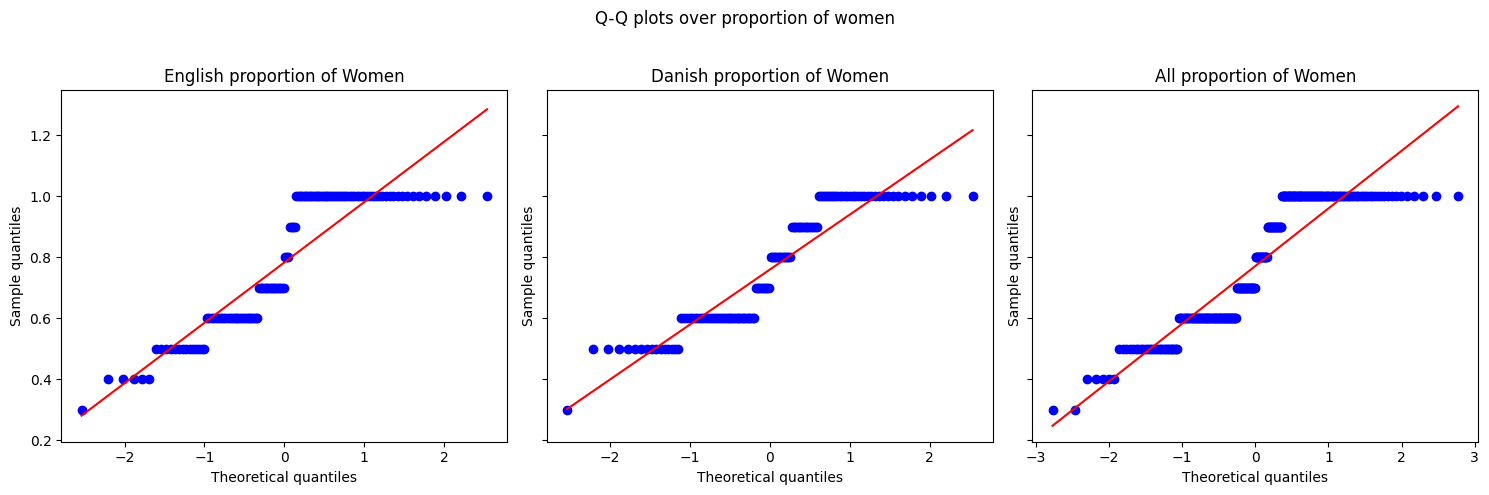

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot histograms
probplot(data_en['prop_women'], dist="norm", plot=axes[0])
axes[0].set_title('English proportion of Women')
axes[0].set_xlabel('Theoretical quantiles')
axes[0].set_ylabel('Sample quantiles')

probplot(data_da['prop_women'], dist="norm", plot=axes[1])
axes[1].set_title('Danish proportion of Women')
axes[1].set_xlabel('Theoretical quantiles')
axes[1].set_ylabel('Sample quantiles')

probplot(data_all['prop_women'], dist="norm", plot=axes[2])
axes[2].set_title('All proportion of Women')
axes[2].set_xlabel('Theoretical quantiles')
axes[2].set_ylabel('Sample quantiles')

# Adjust layout
plt.suptitle('Q-Q plots over proportion of women')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


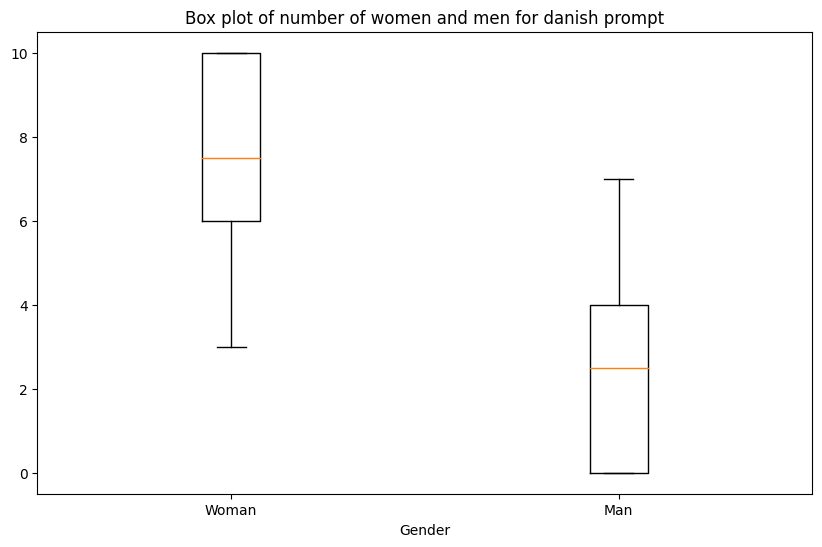

In [17]:
plt.figure(figsize=(10, 6))

plt.boxplot([data_all['Woman'],data_all['Man']], labels=['Woman', 'Man'])
plt.title('Box plot of number of women and men for danish prompt')
plt.xlabel('Gender')
plt.ylabel('')

plt.show()

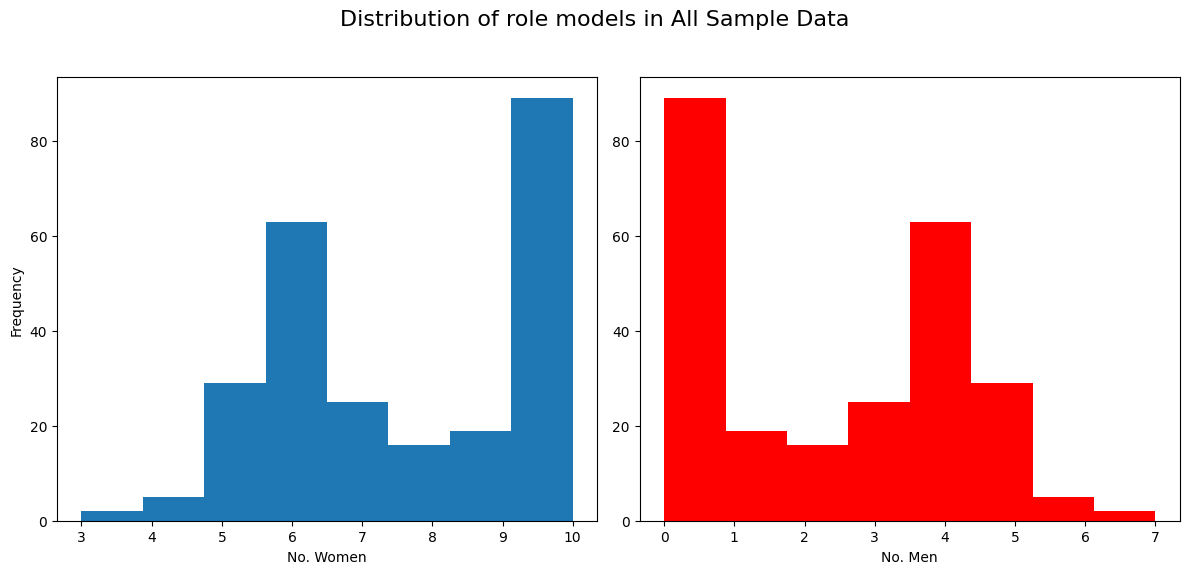

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histograms
ax[0].hist(data_all['Woman'], bins=8)

ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('No. Women' )

ax[1].hist(data_all['Man'], bins=8, color='red', linestyle='solid')
ax[1].set_xlabel('No. Men')

# Adding an overall title
fig.suptitle('Distribution of role models in All Sample Data', fontsize=16)

# Adjust layout to make room for the overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [19]:
import numpy as np
from scipy import stats

data= data_en['prop_women']
# Perform the K-S test against a normal distribution
# Note: 'norm' assumes mean=0 and std=1; if your data has different mean and std, you need to standardize it first
mean = np.mean(data)
std = np.std(data)
standardized_data = (data - mean) / std

ks_statistic, p_value = stats.kstest(standardized_data, 'norm')

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the sample does not follow the normal distribution.")
else:
    print("Fail to reject the null hypothesis: the sample follows the normal distribution.")

KS Statistic: 0.2874307672800611
P-value: 1.4562782665762165e-09
Reject the null hypothesis: the sample does not follow the normal distribution.


In [70]:
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt

# Generate some sample data
data = temp1['prop_women']
# Number of bootstrap samples
#boot strapping was not used
n_bootstrap = 1000

# Perform bootstrap
bootstrap_sample = np.random.choice(data, size=n_bootstrap, replace=True)

boot_ks_statistic, boot_p_value = kstest(bootstrap_sample, 'norm', args=(np.mean(data), np.std(data)))

# Calculate the original K-S statistic
original_ks_statistic, original_p_value = kstest(data, 'norm', args=(np.mean(data), np.std(data)))

print(f"K-S Statistic: Original {original_ks_statistic}" f" bootstrap {boot_ks_statistic}")
print(f"p-value: original {original_p_value}",f"bootstrap {boot_p_value}")


K-S Statistic: Original 0.2507887055283174 bootstrap 0.2493693506896077
p-value: original 0.0006362814647018489 bootstrap 2.846489147915584e-55


In [61]:

kstest(bootstrap_sample, 'norm', args=(np.mean(data), np.std(data)))

KstestResult(statistic=0.2443693506896077, pvalue=4.578255090747849e-53, statistic_location=0.6, statistic_sign=-1)

In [ ]:
# Perform the K-S test against a normal distribution
# Note: 'norm' assumes mean=0 and std=1; if your data has different mean and std, you need to standardize it first
data= kvinder['prop_women']
mean = np.mean(data)
std = np.std(data)
standardized_data = (data - mean) / std

ks_statistic, p_value = stats.kstest(standardized_data, 'norm')

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the sample does not follow the normal distribution.")
else:
    print("Fail to reject the null hypothesis: the sample follows the normal distribution.")

KS Statistic: 0.3389253763010021
P-value: 7.39179478062829e-07
Reject the null hypothesis: the sample does not follow the normal distribution.


In [ ]:
import numpy as np
import scipy.stats as stats

# Sample data (replace with your actual data)

# Specify the theoretical distribution (e.g., normal, uniform, etc.)
distribution = 'norm'

# Perform Kolmogorov-Smirnov test
statistic, p_value = stats.kstest(women['Woman'], distribution)

print(f"Test Statistic (D): {statistic}")
print(f"P-Value: {p_value}")

# Compare with significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sample does not follow the specified distribution.")
else:
    print("Fail to reject the null hypothesis: Sample follows the specified distribution.")

Test Statistic (D): 0.9999999999987201
P-Value: 0.0
Reject the null hypothesis: Sample does not follow the specified distribution.


In [ ]:
#dk

mm, mw =  sum(mænd['Man']) ,sum(mænd['Woman']) 
wm,ww = sum(kvinder['Man']),sum(kvinder['Woman'])

import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table as a 2D numpy array
observed = np.array([[mm, mw],
                     [wm, ww]])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 200.40738682511864
P-value: 1.701889722599567e-45
Degrees of freedom: 1
Expected frequencies:
[[149. 471.]
 [149. 471.]]


In [ ]:
#en
mm, mw =  sum(temp1['Man']) ,sum(temp1['Woman']) 
wm,ww = sum(temp2['Man']),sum(temp2['Woman'])

observed = np.array([[mm, mw],
                     [wm, ww]])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 291.9802908893219
P-value: 1.8410849563599373e-65
Degrees of freedom: 1
Expected frequencies:
[[134.5 485.5]
 [134.5 485.5]]


In [ ]:
#en vs dk
mm ,mw = sum(data_da['Man']),sum(data_da['Woman']) 
wm, ww =sum(data_en['Man']),sum(data_en['Woman']) 
observed = np.array([[mm, mw],
                     [wm, ww]])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 1.7925435454621725
P-value: 0.18061656418223418
Degrees of freedom: 1
Expected frequencies:
[[283.5 956.5]
 [283.5 956.5]]


In [ ]:
#All boys vs girls

mm, mw = sum(men['Man']), sum(men['Woman'])
wm, ww = sum(women['Man']), sum(women['Woman'])

observed = np.array([[mm, mw],
                     [wm, ww]])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")

Chi-square statistic: 488.01998025207644
P-value: 3.8427631823732636e-108
Degrees of freedom: 1
Expected frequencies:


In [ ]:
#mænd & men
dm, dw =sum(mænd['Man']), sum(mænd['Woman'])
em ,ew = sum(temp1['Man']), sum(temp1['Woman'])

observed = np.array([[dm, dw],
                     [em, ew]])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.01328423167057248
P-value: 0.9082412289367401
Degrees of freedom: 1
Expected frequencies:
[[257.5 362.5]
 [257.5 362.5]]


In [ ]:
#Kvinder vs Women
dm, dw =sum(kvinder['Man']), sum(kvinder['Woman'])
em ,ew = sum(temp2['Man']), sum(temp2['Woman'])

observed = np.array([[dm, dw],
                     [em, ew]])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 19.28969178969179
P-value: 1.123110646079895e-05
Degrees of freedom: 1
Expected frequencies:
[[ 26. 594.]
 [ 26. 594.]]


In [ ]:
kvinder['Man'].mean(), kvinder['Woman'].mean()

temp2['Man'].mean(), temp2['Woman'].mean()

(0.16129032258064516, 9.838709677419354)

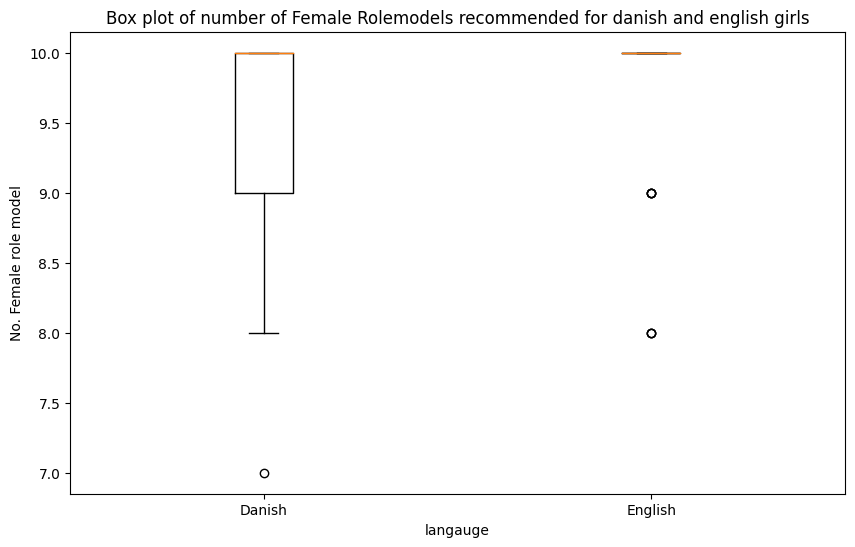

In [ ]:
plt.figure(figsize=(10, 6))

plt.boxplot([kvinder['Woman'],temp2['Woman']], labels=['Danish', 'English'])
plt.title('Box plot of number of Female Rolemodels recommended for danish and english girls' )
plt.xlabel('langauge')
plt.ylabel('No. Female role model')

plt.show()

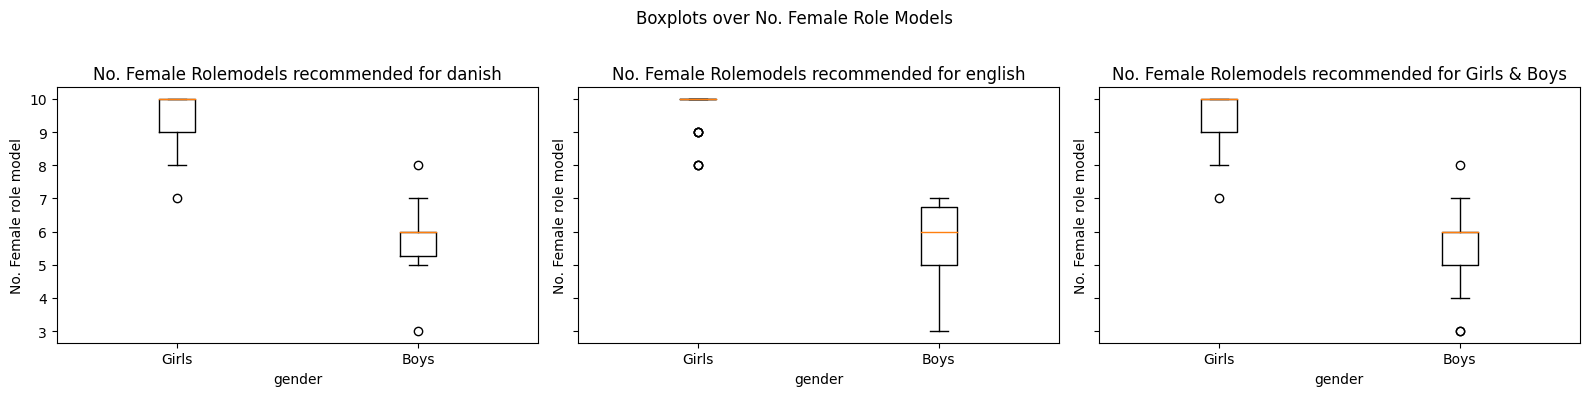

5.870967741935484 9.32258064516129


In [ ]:



fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

# Plot histograms
axes[0].boxplot([kvinder['Woman'],mænd['Woman']], labels=['Girls', 'Boys'])
axes[0].set_title('No. Female Rolemodels recommended for danish' )
axes[0].set_xlabel('gender')
axes[0].set_ylabel('No. Female role model')

axes[1].boxplot([temp2['Woman'],temp1['Woman']], labels=['Girls', 'Boys'])
axes[1].set_title('No. Female Rolemodels recommended for english')
axes[1].set_xlabel('gender')
axes[1].set_ylabel('No. Female role model')

axes[2].boxplot([women['Woman'],men['Woman']], labels=['Girls', 'Boys'])
axes[2].set_title('No. Female Rolemodels recommended for Girls & Boys')
axes[2].set_xlabel('gender')
axes[2].set_ylabel('No. Female role model')

# Adjust layout
plt.suptitle('Boxplots over No. Female Role Models')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


print(mænd['Woman'].mean(),kvinder['Woman'].mean())